<a href="https://colab.research.google.com/github/kuroitenshi9/nonsense/blob/master/Kopia_notatnika_RiPO_L3__58442.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**RiPO_Lab_3**

Douczanie i testowanie sieci konwolucyjnych pretrenowanych

$\color{red}{Uwaga:}$

1- proszę pamiętać o zmianie słowa ***Album*** w nazwie pliku i uzupełnieniu swoich danych powyżej tego pola;

2- kluczowe polecenia, stanowiące krok jakiegoś procesu, proszę opatrzyć komentarzem;

3- założenia do zadań (jeśli są wskazane) piszemy w polu tekstowym przed rozwiązaniem zadania, a wnioski, pod zadaniem.

In [ ]:
# Podpisywanie pracy
NN = input("Podaj Imię i Nazwisko: ")
ALBUM = input("Podaj numer albumu: ")

Podaj Imię i Nazwisko: Ewa Bielawska
Podaj numer albumu: 58442


In [ ]:
# Ocena pracy. Proszę nie zmieniać komórek z kodem pomocniczym do oceny.
punkty = []
max = int(55)

### **Zad 3.1.** Przygotuj środowisko Colaboratory do testowania i uczenia CNN. Przygotuj odpowiednie zbiory danych bazując na wybranych 5 rasach psów wybranych ze pełnego zbioru Stanford_Dogs_Dataset.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

In [ ]:
import os
folder_path = '/content/drive/MyDrive/RiPO/L3/Obrazy'
os.makedirs(folder_path, exist_ok=True)

In [ ]:
!wget -P /content/drive/MyDrive/RiPO/L3/Obrazy http://vision.stanford.edu/aditya86/ImageNetDogs/images.tar
!tar -xvf /content/drive/MyDrive/RiPO/L3/Obrazy/images.tar -C /content/drive/MyDrive/RiPO/L3/Obrazy

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
Images/n02109047-Great_Dane/n02109047_34148.jpg
Images/n02109047-Great_Dane/n02109047_34162.jpg
Images/n02109047-Great_Dane/n02109047_34209.jpg
Images/n02109047-Great_Dane/n02109047_3643.jpg
Images/n02109047-Great_Dane/n02109047_4267.jpg
Images/n02109047-Great_Dane/n02109047_481.jpg
Images/n02109047-Great_Dane/n02109047_5618.jpg
Images/n02109047-Great_Dane/n02109047_5675.jpg
Images/n02109047-Great_Dane/n02109047_5822.jpg
Images/n02109047-Great_Dane/n02109047_5894.jpg
Images/n02109047-Great_Dane/n02109047_5936.jpg
Images/n02109047-Great_Dane/n02109047_6008.jpg
Images/n02109047-Great_Dane/n02109047_6265.jpg
Images/n02109047-Great_Dane/n02109047_6276.jpg
Images/n02109047-Great_Dane/n02109047_6447.jpg
Images/n02109047-Great_Dane/n02109047_6680.jpg
Images/n02109047-Great_Dane/n02109047_7072.jpg
Images/n02109047-Great_Dane/n02109047_7156.jpg
Images/n02109047-Great_Dane/n02109047_7227.jpg
Images/n02109047-Great_Dane/n02109047_74

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

base_dir = '/content/drive/MyDrive/RiPO/L3/Obrazy/Images'
target_dir = '/content/drive/MyDrive/RiPO/L3/dataset'
splits = ['train', 'validation', 'test']
klasy = ['n02085782-Japanese_spaniel', 'n02088238-basset',
         'n02088094-Afghan_hound', 'n02087394-Rhodesian_ridgeback', 'n02087046-toy_terrier']

for split in splits:
  for klasa in klasy:
    os.makedirs(os.path.join(target_dir, split, klasa), exist_ok=True)

In [ ]:
test_size = 0.25
val_size = 0.33

for klasa in klasy:
  sciezka_klasy = os.path.join(base_dir, klasa)
  pliki=os.listdir(sciezka_klasy)
  pelne_sciezki = [os.path.join(sciezka_klasy, f) for f in pliki]

  train_files, test_files = train_test_split(pelne_sciezki, test_size=test_size, random_state=42)
  train_files, val_files = train_test_split(pelne_sciezki, test_size=val_size, random_state=42)

  for plik in train_files:
    shutil.copy(plik, os.path.join(target_dir, 'train', klasa))
  for plik in val_files:
    shutil.copy(plik, os.path.join(target_dir, 'validation', klasa))
  for plik in test_files:
    shutil.copy(plik, os.path.join(target_dir, 'test', klasa))

In [ ]:
# Maksymalna wartość punktów za Zad 3.1: 10
punkty.append(10)

### **Zad 3.2.** Wykorzystując narzędzia klasy *ImageDataGenerator* biblioteki **Keras** utwórz klasę kastomizowaną do generowania obrazów z nałożonym szumem.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import random

class CustomImageDataGenerator(ImageDataGenerator):
    def __init__(self, noise_type='normal', **kwargs):
        self.noise_type = noise_type
        super().__init__(preprocessing_function = self.normal_noise, **kwargs)

    def add_noise(self, img):
        if self.noise_type == 'normal':
            return self.normal_noise(img)
        elif self.noise_type == 'uniform':
            return self.uniform_noise(img)
        elif self.noise_type == 'sp':
            return self.sp_noise(img)
        else:
            raise ValueError("Invalid noise type, choose from normal, uniform, sp (salt pepper)")

    @staticmethod
    def normal_noise(img, loc=0, scale=30):
        noise = np.random.normal(loc=loc, scale=scale, size=img.shape)
        img2 = img + noise
        return np.clip(img2, 0, 255)

    @staticmethod
    def uniform_noise(img, low=-30, high=30,):
        noise = np.random.uniform(low=low, high=high, size=img.shape)
        img2 = img + noise
        return np.clip(img2, 0, 255)

    @staticmethod
    def sp_noise(img, th=0.05):
        img2 = img.copy()
        th2 = 1 - th
        for i in range(img2.shape[0]):
            for j in range(img2.shape[1]):
                r = random.random()
                if r < th:
                    img2[i, j] = np.array([0,0,0])
                elif r > th2:
                    img2[i, j] = np.array([255,255,255])

        return np.clip(img2, 0, 255)


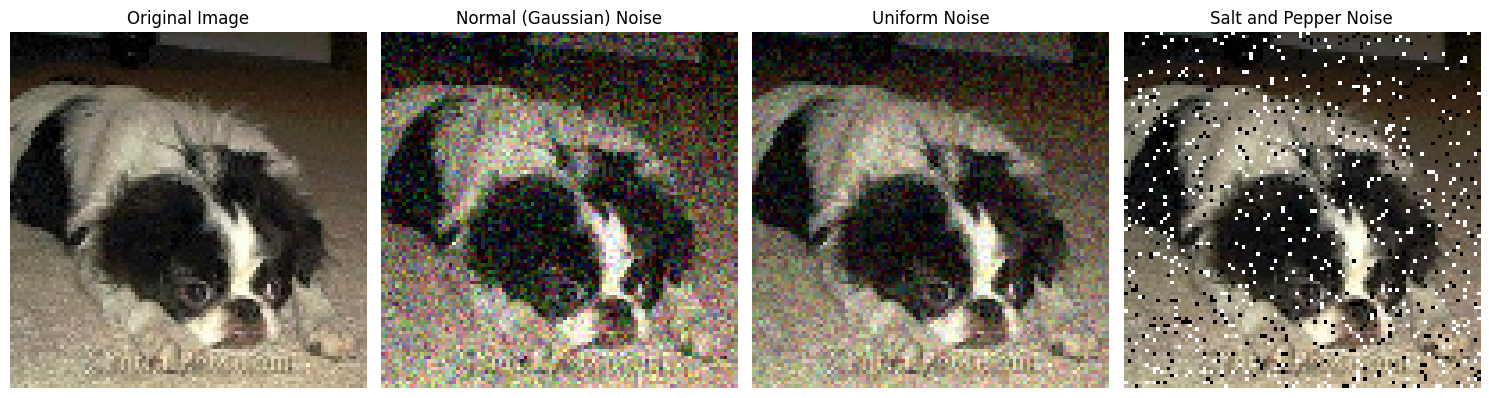

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img_path = '/content/drive/MyDrive/RiPO/L3/dataset/test/n02085782-Japanese_spaniel/n02085782_3899.jpg'

original_img = load_img(img_path, target_size=(100, 100))
img_array = img_to_array(original_img)

nrm_img = img_array / 255.0

normal_noise_gen = CustomImageDataGenerator(noise_type='normal')
uniform_noise_gen = CustomImageDataGenerator(noise_type='uniform')
sp_noise_gen = CustomImageDataGenerator(noise_type='sp')

img_normal_noise = normal_noise_gen.add_noise(img_array)
img_uniform_noise = uniform_noise_gen.add_noise(img_array)
img_sp_noise = sp_noise_gen.add_noise(img_array)

def display_images(images, titles, cmap=None):

    plt.figure(figsize=(15, 5))
    for i, (img, title) in enumerate(zip(images, titles)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(img, cmap=cmap)
        plt.title(title)
        plt.axis('off')
    plt.tight_layout()
    plt.show()

display_images(
    images=[
        nrm_img,
        img_normal_noise / 255.0,
        img_uniform_noise / 255.0,
        img_sp_noise / 255.0
    ],
    titles=['Original Image', 'Normal (Gaussian) Noise', 'Uniform Noise', 'Salt and Pepper Noise']
)


In [ ]:
# Maksymalna wartość punktów za Zad 3.2: 10
punkty.append(10)

### **Zad 3.3.** Utwórz po jednym generatorze obrazów dla każdego podzbioru i jeden dodatkowy na podzbiorze treningowym z wybranym szumem i dodatkowo sprametryzowaną augmentacją. Utwórz procedurę kombinowania generatorów.

In [ ]:
target_img_size =(64,64)
batch_size = 32
class_mode = 'categorical'
keep_aspect_ratio = True
interpolation = 'nearest'

train_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'train'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode,
    keep_aspect_ratio=keep_aspect_ratio,
    interpolation=interpolation)

val_datagen = ImageDataGenerator(
    rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    os.path.join(target_dir, 'validation'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode,
    keep_aspect_ratio=keep_aspect_ratio,
    interpolation=interpolation)

test_datagen = ImageDataGenerator(
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(target_dir, 'test'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode,
    keep_aspect_ratio=keep_aspect_ratio,
    interpolation=interpolation)

augm_datagen = CustomImageDataGenerator(
    rescale=1./255,
    fill_mode = 'constant',
    zoom_range = 0.3,
    rotation_range = 20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)

augm_generator = augm_datagen.flow_from_directory(
    os.path.join(target_dir, 'train'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode,
    keep_aspect_ratio=keep_aspect_ratio,
    interpolation=interpolation)

Found 630 images belonging to 5 classes.
Found 313 images belonging to 5 classes.
Found 237 images belonging to 5 classes.
Found 630 images belonging to 5 classes.


In [ ]:
def combine_generators(*generators):
    while True:
        for g in generators:
            yield next(g)

In [ ]:
combined_generator = combine_generators(train_generator, augm_generator)

for i, (images, labels) in enumerate(combined_generator):
    print(f"Batch {i+1}: images.shape={images.shape}, labels.shape={labels.shape}")
    if i == 2:
        break

Batch 1: images.shape=(32, 64, 64, 3), labels.shape=(32, 5)
Batch 2: images.shape=(32, 64, 64, 3), labels.shape=(32, 5)
Batch 3: images.shape=(32, 64, 64, 3), labels.shape=(32, 5)


Batch 1: images.shape=(32, 64, 64, 3), labels.shape=(32, 5)


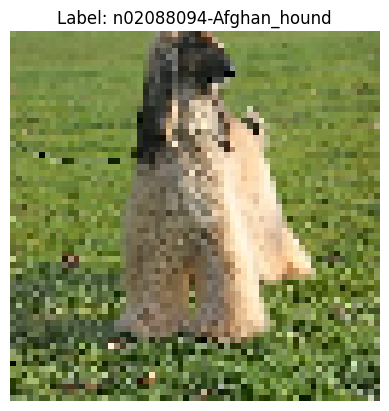

Batch 2: images.shape=(32, 64, 64, 3), labels.shape=(32, 5)


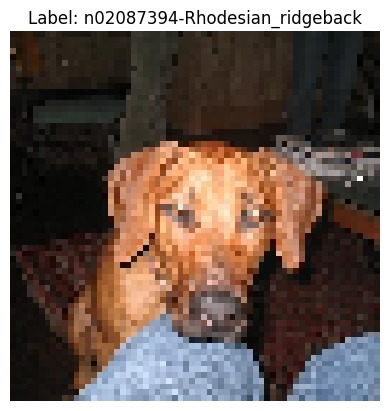

Batch 3: images.shape=(32, 64, 64, 3), labels.shape=(32, 5)


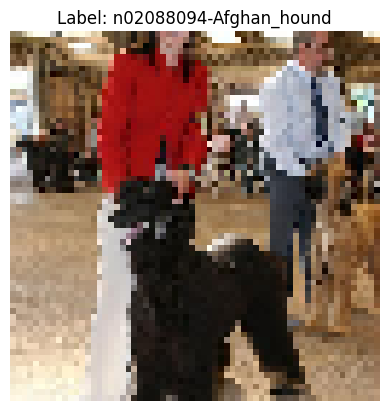

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def show_image_with_label(image, label, class_names):
    plt.imshow(image)
    plt.title(f"Label: {class_names[np.argmax(label)]}")
    plt.axis("off")
    plt.show()

num_batches = 3
class_names = list(test_generator.class_indices.keys())
for i, (images, labels) in enumerate(test_generator):
    if i >= num_batches:
        break

    print(f"Batch {i + 1}: images.shape={images.shape}, labels.shape={labels.shape}")

    first_image = images[0]
    first_label = labels[0]

    first_image = (first_image * 255).astype("uint8")
    show_image_with_label(first_image, first_label, class_names)


In [ ]:
# Maksymalna wartość punktów za Zad 3.3: 10
punkty.append(10)

### **Zad 3.4.** Zbuduj, i wytrenuj model (zbudowany z zamrożonych warstw konwolucyjnych pretrenowanego modelu VGG16 na zbiorze ImageNet oraz z własnych warstw gęstych) klasyfikujący przykładowe obrazy ze zbioru Stanford Dogs Dataset, wykorzystujące generatory danych obrazowych z poprzednich ćwiczeń.

In [ ]:
import numpy as np
import random
from keras import models, layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import os
from PIL import Image

input_shape = (64, 64, 3)
epochs = 10
batch_size = 32
num_classes = 5
learning_rate=0.001

convolutional_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)

convolutional_base.summary()


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 64, 64, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 64, 64, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 64, 64, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 32, 32, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 16, 16, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 16, 16, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 8, 8, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 8, 8, 512)           │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 8, 8, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 4, 4, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 4, 4, 512)           │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 2, 2, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
convolutional_base.trainable = False
model=models.Sequential()
model.add(convolutional_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 2, 2, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             325 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,846,149 (56.63 MB)

 Trainable params: 131,461 (513.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [ ]:
callbacks = [
    EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True),
    ModelCheckpoint(filepath='best_model.keras', save_best_only=True)
]

history = model.fit(
    x = combine_generators(train_generator, augm_generator),
    steps_per_epoch=(train_generator.samples+augm_generator.samples)//batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples//batch_size)

Epoch 1/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.3142 - loss: 1.6144

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 98s 2s/step - accuracy: 0.3158 - loss: 1.6110 - val_accuracy: 0.4896 - val_loss: 1.2075
Epoch 2/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.4759 - loss: 1.2472 - val_accuracy: 0.5600 - val_loss: 1.0872
Epoch 3/10


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


39/39 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.5346 - loss: 1.0998 - val_accuracy: 0.5278 - val_loss: 1.1271
Epoch 4/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 125s 3s/step - accuracy: 0.5971 - loss: 1.0415 - val_accuracy: 0.5600 - val_loss: 1.1961
Epoch 5/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 85s 2s/step - accuracy: 0.6444 - loss: 0.9116 - val_accuracy: 0.5833 - val_loss: 1.0139
Epoch 6/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 71s 2s/step - accuracy: 0.6635 - loss: 0.8960 - val_accuracy: 0.3600 - val_loss: 1.6507
Epoch 7/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6803 - loss: 0.8199 - val_accuracy: 0.6042 - val_loss: 1.0083
Epoch 8/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.6559 - loss: 0.8621 - val_accuracy: 0.6800 - val_loss: 1.0907
Epoch 9/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.6709 - loss: 0.8205 - val_accuracy: 0.6250 - val_loss: 0.9461
Epoch 10/10
39/39 ━━━━━━━━━━━━━━━━━━━━ 73s 2s/step - accuracy: 0.6831 - loss: 0.8121 - val_accuracy: 0.4400 - val_loss: 1.1310


In [ ]:
# Maksymalna wartość punktów za Zad 3.4: 10
punkty.append(10)

### **Zad 3.5.** Wydrukuj na ekranie metryki klasyfikacyjne dla wszystkich podzbiorów. Narysuj wykresy dokładności uczenia i błędów na zbiorze treningowym i walidacyjnym oraz macierz pomyłem na zbiorze testowym. Zapisz model do pliku. Przedstaw wnioski.

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

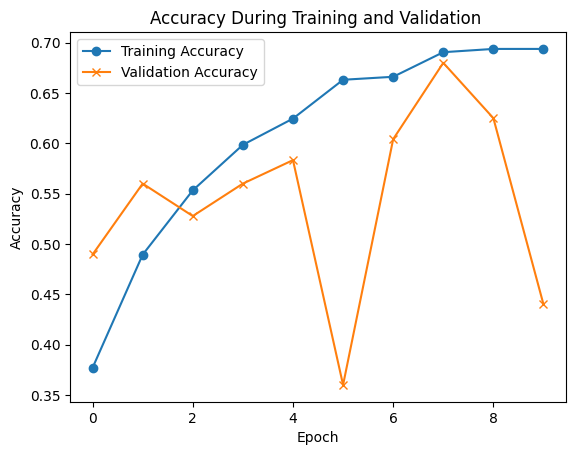

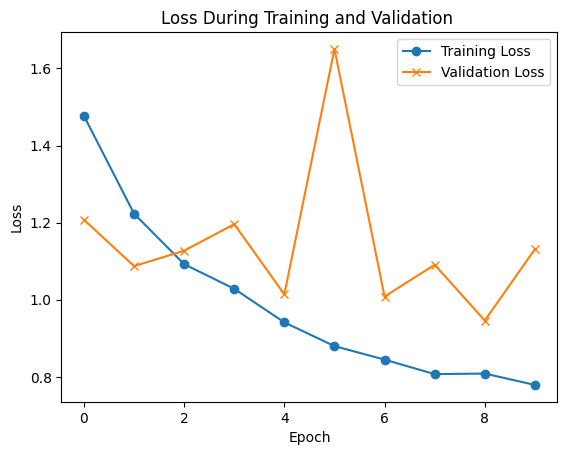

In [ ]:
plt.title('Accuracy During Training and Validation ')
plt.plot(train_accuracy, label='Training Accuracy', marker='o')
plt.plot(val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.title('Loss During Training and Validation ')
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
for epoch, (acc, val_acc, loss, val_loss) in enumerate(zip(train_accuracy, val_accuracy, train_loss, val_loss)):
    print(f"Epoch {epoch + 1}: Training Accuracy = {acc:.2f}, Validation Accuracy = {val_acc:.2f}, Training Loss = {loss:.2f}, Validation Loss = {val_loss:.2f}")


Epoch 1: Training Accuracy = 0.38, Validation Accuracy = 0.49, Training Loss = 1.48, Validation Loss = 1.21
Epoch 2: Training Accuracy = 0.49, Validation Accuracy = 0.56, Training Loss = 1.22, Validation Loss = 1.09
Epoch 3: Training Accuracy = 0.55, Validation Accuracy = 0.53, Training Loss = 1.09, Validation Loss = 1.13
Epoch 4: Training Accuracy = 0.60, Validation Accuracy = 0.56, Training Loss = 1.03, Validation Loss = 1.20
Epoch 5: Training Accuracy = 0.62, Validation Accuracy = 0.58, Training Loss = 0.94, Validation Loss = 1.01
Epoch 6: Training Accuracy = 0.66, Validation Accuracy = 0.36, Training Loss = 0.88, Validation Loss = 1.65
Epoch 7: Training Accuracy = 0.67, Validation Accuracy = 0.60, Training Loss = 0.84, Validation Loss = 1.01
Epoch 8: Training Accuracy = 0.69, Validation Accuracy = 0.68, Training Loss = 0.81, Validation Loss = 1.09
Epoch 9: Training Accuracy = 0.69, Validation Accuracy = 0.62, Training Loss = 0.81, Validation Loss = 0.95
Epoch 10: Training Accuracy 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 2s/step


In [ ]:
y_pred_prob

array([[2.5175407e-03, 5.9688103e-01, 1.1782424e-02, 8.7103965e-03,
        3.8010859e-01],
       [8.0695772e-01, 4.4531796e-02, 2.0611645e-03, 2.0424656e-03,
        1.4440678e-01],
       [1.8660431e-01, 3.7475592e-01, 6.2300232e-03, 4.3243997e-02,
        3.8916582e-01],
       ...,
       [2.6679002e-03, 9.7884104e-02, 4.4668335e-01, 4.2811239e-01,
        2.4652274e-02],
       [1.2593232e-01, 2.2469619e-01, 4.7693509e-01, 6.5677655e-03,
        1.6586855e-01],
       [2.7775208e-02, 7.0126247e-05, 6.0285587e-05, 9.7154939e-01,
        5.4506410e-04]], dtype=float32)

In [ ]:
true_labels = test_generator.classes

In [ ]:
from sklearn.metrics import classification_report
true_labels = test_generator.classes

print("Classification Report:")
class_report = classification_report(true_labels, y_pred, target_names=list(test_generator.class_indices.keys()))
print(class_report)

Classification Report:
                               precision    recall  f1-score   support

   n02085782-Japanese_spaniel       0.19      0.21      0.20        47
        n02087046-toy_terrier       0.16      0.23      0.19        43
n02087394-Rhodesian_ridgeback       0.13      0.09      0.11        43
       n02088094-Afghan_hound       0.23      0.18      0.20        60
             n02088238-basset       0.19      0.18      0.19        44

                     accuracy                           0.18       237
                    macro avg       0.18      0.18      0.18       237
                 weighted avg       0.18      0.18      0.18       237



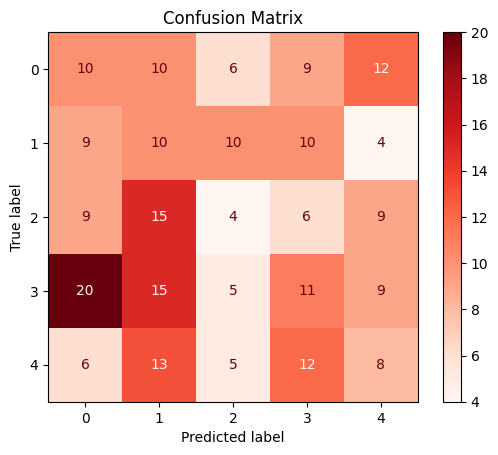

In [ ]:
cm = confusion_matrix(true_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model_path = "model_stanford_dogs_5breed.keras"
model.save(model_path)
print(f"Model saved to {model_path}")

Model saved to model_stanford_dogs_5breed.keras


Na podstawie wyników treningu oraz analizy wyników klasyfikacji, mogę stwierdzić, że model ma kilka istotnych problemów. Na początku treningu dokładność modelu była stosunkowo niska – wynosiła około 38-49%, ale w miarę postępu, w końcowych epokach udało się osiągnąć około 69% na zbiorze walidacyjnym. Choć widać postęp, to model miał tendencję do lepszych wyników na zbiorze treningowym niż na walidacyjnym, co sugeruje, że może nie do końca potrafi uogólniać wiedzę na nowe dane, czyli jest przeuczony na dane treningowe. Spadek dokładności w 6. i 9. epoce może być efektem niestabilności procesu nauki, co może sugerować, że model nie zdążył jeszcze odpowiednio „przyswoić” wzorców w danych.

Patrząc na straty (loss), zauważamy, że w miarę postępu treningu spadały, ale w 6. epoce, mimo wzrostu dokładności na zbiorze treningowym, straty na zbiorze walidacyjnym wzrosły. Może to sugerować, że model zaczyna zapamiętywać dane, zamiast uczyć się ogólnych zależności, co jest jednym z objawów przeuczenia. Mimo to, ogólna tendencja jest pozytywna, bo model z każdą epoką stawał się nieco lepszy, choć można by go poprawić, dając mu więcej czasu na naukę.

Raport z klasyfikacji pokazuje, że model ma bardzo niską dokładność wynoszącą tylko 18%. Oznacza to, że model nie potrafi dobrze klasyfikować obrazów psów do odpowiednich ras. Problem pojawia się zarówno w dokładności (precision), jak i w wykrywaniu (recall), co wskazuje, że model często myli rasy lub w ogóle ich nie rozpoznaje. Ponadto, wskaźnik F1, który uwzględnia zarówno dokładność, jak i wykrywanie, także jest niski, co tylko potwierdza, że model nie radzi sobie z tym zadaniem.

Z analizy macierzy pomyłek wynika, że model myli niektóre rasy, zwłaszcza 1. (Toy Terrier), z innymi, np. 3. (Rhodesian Ridgeback) czy 4. (Basset). Z 20 przypadków przypisanych błędnie do klasy 1, może wynikać, że niektóre rasy mają podobne cechy wizualne, przez co model ma trudności z ich rozróżnieniem. Ogólnie przewidywania są rozproszone w macierzy pomyłek, a to oznacza, że model nie jest w stanie skutecznie rozpoznać psów danej rasy i zamiast tego klasyfikuje je losowo, nie skupiając się na tych obrazach, które powinien poprawnie przypisać.

Z tych obserwacji wynika, że model potrzebuje lepszego zestawu danych do nauki. Warto zwiększyć liczbę zdjęć, szczególnie tych trudniejszych ras, które są podobne do siebie. Dodatkowo, poprawa jakości zdjęć, np. usuwanie rozmycia, zmiana kontrastu czy, mogłaby poprawić skuteczność modelu. Dobrym pomysłem byłoby także wydłużenie czasu treningu, by model miał szansę lepiej się nauczyć, a także eksperymentowanie z różnymi technikami, które pomogą uniknąć przeuczenia. Zamiast korzystać tylko z VGG16, warto spróbować innych architektur, które mogą lepiej radzić sobie z tym zadaniem, np. ResNet, które jest bardziej zaawansowane i może lepiej uchwycić szczegóły w obrazach. Ponadto, zastosowanie regularizacji, jak np. dropout, może zapobiec nadmiernemu dopasowaniu modelu do danych treningowych, a to pomogłoby poprawić jego działanie na zbiorze walidacyjnym.

Podsumowując, model wykazuje liczne trudności w poprawnym rozróżnianiu ras psów, co skutkuje bardzo niską dokładnością. W celu poprawy wyników warto przeanalizować dane wejściowe i dostosować parametry modelu, aby uzyskać lepsze efekty w rozpoznawaniu psów na obrazach.

In [ ]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Dropout, GlobalAveragePooling2D, BatchNormalization
from tensorflow.keras.optimizers import Adam
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

target_img_size = (224, 224)
batch_size = 32
class_mode = 'categorical'
epochs = 20
learning_rate = 1e-4
keep_aspect_ratio= True
interpolation = 'nearest'

train_datagen = ImageDataGenerator(
    rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    os.path.join(target_dir, 'train'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode,
    keep_aspect_ratio=keep_aspect_ratio,
    interpolation=interpolation)

val_datagen = ImageDataGenerator(
    rescale=1./255)

val_generator = val_datagen.flow_from_directory(
    os.path.join(target_dir, 'validation'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode)

test_datagen = ImageDataGenerator(
    rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    os.path.join(target_dir, 'test'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode)

augm_datagen = CustomImageDataGenerator(
    rescale=1./255,
    fill_mode = 'nearest',
    zoom_range = 0.2,
    rotation_range = 30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True)

augm_generator = augm_datagen.flow_from_directory(
    os.path.join(target_dir, 'train'),
    target_size=target_img_size,
    batch_size=batch_size,
    class_mode=class_mode,
    keep_aspect_ratio=keep_aspect_ratio,
    interpolation=interpolation)

Found 630 images belonging to 5 classes.
Found 313 images belonging to 5 classes.
Found 237 images belonging to 5 classes.
Found 630 images belonging to 5 classes.


In [ ]:
def combine_generators(*generators):
    while True:
        for g in generators:
            yield next(g)

In [ ]:
combined_generator = combine_generators(train_generator, augm_generator)

for i, (images, labels) in enumerate(combined_generator):
    print(f"Batch {i+1}: images.shape={images.shape}, labels.shape={labels.shape}")
    if i == 2:
        break

Batch 1: images.shape=(32, 224, 224, 3), labels.shape=(32, 5)
Batch 2: images.shape=(32, 224, 224, 3), labels.shape=(32, 5)
Batch 3: images.shape=(32, 224, 224, 3), labels.shape=(32, 5)


In [ ]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import Adam

num_classes = 5

base_model = EfficientNetB0(
    weights='imagenet',
    include_top=False,
    input_shape=(224, 224, 3))
base_model.summary()

Model: "efficientnetb0"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_2 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ input_layer_2[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 224, 224, 3)    │              7 │ rescaling_2[0][0]      │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ rescaling_3 (Rescaling)   │ (None, 224, 224, 3)    │              0 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv_pad             │ (None, 225, 225, 3)    │              0 │ rescaling_3[0][0]      │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_conv (Conv2D)        │ (None, 112, 112, 32)   │            864 │ stem_conv_pad[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_bn                   │ (None, 112, 112, 32)   │            128 │ stem_conv[0][0]        │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ stem_activation           │ (None, 112, 112, 32)   │              0 │ stem_bn[0][0]          │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_dwconv            │ (None, 112, 112, 32)   │            288 │ stem_activation[0][0]  │
│ (DepthwiseConv2D)         │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_bn                │ (None, 112, 112, 32)   │            128 │ block1a_dwconv[0][0]   │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_activation        │ (None, 112, 112, 32)   │              0 │ block1a_bn[0][0]       │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_squeeze        │ (None, 32)             │              0 │ block1a_activation[0]… │
│ (GlobalAveragePooling2D)  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reshape        │ (None, 1, 1, 32)       │              0 │ block1a_se_squeeze[0]… │
│ (Reshape)                 │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ block1a_se_reduce         │ (None, 1, 1, 8)        │            264 │ block1a_se_reshape[0]… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 4,049,571 (15.45 MB)

 Trainable params: 4,007,548 (15.29 MB)

 Non-trainable params: 42,023 (164.16 KB)

In [ ]:
base_model.trainable = False

model = models.Sequential()
model.add(base_model)
model.add(layers.GlobalAveragePooling2D())
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.3))
model.add(layers.Dense(num_classes, activation='softmax'))

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ efficientnetb0 (Functional)          │ (None, 7, 7, 1280)          │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │         163,968 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,219,816 (16.10 MB)

 Trainable params: 167,429 (654.02 KB)

 Non-trainable params: 4,052,387 (15.46 MB)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

history = model.fit(
    train_generator,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    epochs=epochs,
    steps_per_epoch=train_generator.samples // batch_size,
    callbacks=[early_stopping, reduce_lr]
)

base_model.trainable = True
for layer in base_model.layers[:-30]:
    layer.trainable = False

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


19/19 ━━━━━━━━━━━━━━━━━━━━ 101s 4s/step - accuracy: 0.1909 - loss: 2.4015 - val_accuracy: 0.2639 - val_loss: 1.6075 - learning_rate: 0.0010
Epoch 2/20
 1/19 ━━━━━━━━━━━━━━━━━━━━ 37s 2s/step - accuracy: 0.2500 - loss: 2.2146

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 105ms/step - accuracy: 0.2500 - loss: 2.2146 - val_accuracy: 0.1200 - val_loss: 1.6051 - learning_rate: 0.0010
Epoch 3/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 71s 4s/step - accuracy: 0.1557 - loss: 2.1108 - val_accuracy: 0.2535 - val_loss: 1.6022 - learning_rate: 0.0010
Epoch 4/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 19s 962ms/step - accuracy: 0.1562 - loss: 1.8782 - val_accuracy: 0.2400 - val_loss: 1.6196 - learning_rate: 0.0010
Epoch 5/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 77s 4s/step - accuracy: 0.2050 - loss: 1.9925 - val_accuracy: 0.2535 - val_loss: 1.6039 - learning_rate: 0.0010
Epoch 6/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 11s 376ms/step - accuracy: 0.1562 - loss: 1.7897 - val_accuracy: 0.2400 - val_loss: 1.5896 - learning_rate: 0.0010
Epoch 7/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 74s 4s/step - accuracy: 0.2101 - loss: 2.1125 - val_accuracy: 0.2535 - val_loss: 1.6036 - learning_rate: 0.0010
Epoch 8/20
19/19 ━━━━━━━━━━━━━━━━━━━━ 14s 568ms/step - accuracy: 0.1875 - loss: 2.1002 - val_accuracy: 

In [ ]:
model.compile(
    optimizer=Adam(learning_rate=1e-5),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

fine_tuning_history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=10,
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 112s 4s/step - accuracy: 0.2227 - loss: 2.3660 - val_accuracy: 0.1853 - val_loss: 1.6167 - learning_rate: 1.0000e-05
Epoch 2/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 101s 5s/step - accuracy: 0.2432 - loss: 2.2699 - val_accuracy: 0.2524 - val_loss: 1.6659 - learning_rate: 1.0000e-05
Epoch 3/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 162s 6s/step - accuracy: 0.1758 - loss: 2.2434 - val_accuracy: 0.2524 - val_loss: 1.7171 - learning_rate: 1.0000e-05
Epoch 4/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 118s 6s/step - accuracy: 0.2057 - loss: 2.1700 - val_accuracy: 0.1981 - val_loss: 1.7416 - learning_rate: 1.0000e-05
Epoch 5/10
20/20 ━━━━━━━━━━━━━━━━━━━━ 85s 4s/step - accuracy: 0.2199 - loss: 2.2477 - val_accuracy: 0.2524 - val_loss: 1.7512 - learning_rate: 5.0000e-06


In [ ]:
for i, (images, labels) in enumerate(combined_generator):
    print(f"Batch {i+1}: images.shape={images.shape}, labels.shape={labels.shape}")
    if i == 2:
        break

Batch 1: images.shape=(32, 224, 224, 3), labels.shape=(32, 5)
Batch 2: images.shape=(32, 224, 224, 3), labels.shape=(32, 5)
Batch 3: images.shape=(32, 224, 224, 3), labels.shape=(32, 5)


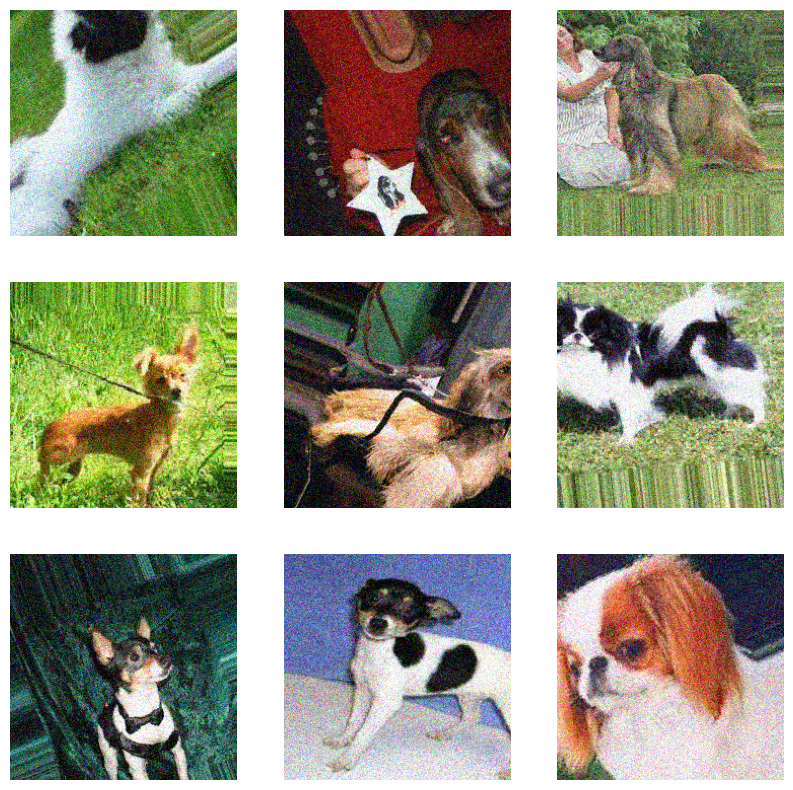

In [ ]:
batch_images, batch_labels = next(augm_generator)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(batch_images[i])
    plt.axis('off')
plt.show()

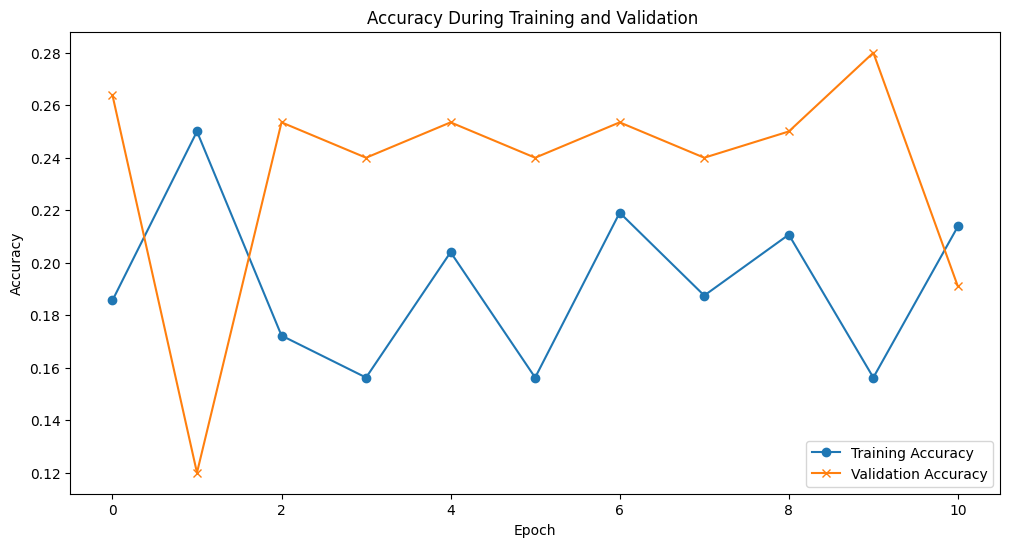

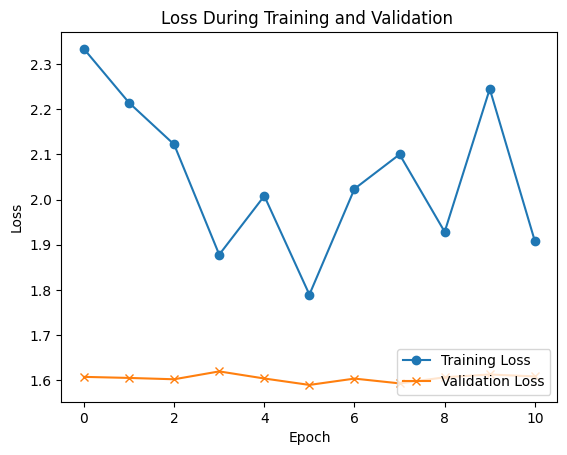

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(train_accuracy))

plt.figure(figsize=(12, 6))

plt.title('Accuracy During Training and Validation ')
plt.plot(epochs_range, train_accuracy, label='Training Accuracy', marker='o')
plt.plot(epochs_range, val_accuracy, label='Validation Accuracy', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.title('Loss During Training and Validation ')
plt.plot(train_loss, label='Training Loss', marker='o')
plt.plot(val_loss, label='Validation Loss', marker='x')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='lower right')
plt.show()


In [ ]:
for epoch, (acc, val_acc, loss, val_loss) in enumerate(zip(train_accuracy, val_accuracy, train_loss, val_loss)):
    print(f"Epoch {epoch + 1}: Training Accuracy = {acc:.2f}, Validation Accuracy = {val_acc:.2f}, Training Loss = {loss:.2f}, Validation Loss = {val_loss:.2f}")

Epoch 1: Training Accuracy = 0.19, Validation Accuracy = 0.26, Training Loss = 2.33, Validation Loss = 1.61
Epoch 2: Training Accuracy = 0.25, Validation Accuracy = 0.12, Training Loss = 2.21, Validation Loss = 1.61
Epoch 3: Training Accuracy = 0.17, Validation Accuracy = 0.25, Training Loss = 2.12, Validation Loss = 1.60
Epoch 4: Training Accuracy = 0.16, Validation Accuracy = 0.24, Training Loss = 1.88, Validation Loss = 1.62
Epoch 5: Training Accuracy = 0.20, Validation Accuracy = 0.25, Training Loss = 2.01, Validation Loss = 1.60
Epoch 6: Training Accuracy = 0.16, Validation Accuracy = 0.24, Training Loss = 1.79, Validation Loss = 1.59
Epoch 7: Training Accuracy = 0.22, Validation Accuracy = 0.25, Training Loss = 2.02, Validation Loss = 1.60
Epoch 8: Training Accuracy = 0.19, Validation Accuracy = 0.24, Training Loss = 2.10, Validation Loss = 1.59
Epoch 9: Training Accuracy = 0.21, Validation Accuracy = 0.25, Training Loss = 1.93, Validation Loss = 1.61
Epoch 10: Training Accuracy 

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)

y_pred_prob

8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step


array([[0.1936343 , 0.17205016, 0.13925672, 0.24592456, 0.24913415],
       [0.19354269, 0.17178102, 0.13952601, 0.24589314, 0.24925722],
       [0.19373474, 0.17212744, 0.13912015, 0.24600945, 0.24900816],
       ...,
       [0.19404727, 0.1723124 , 0.13883635, 0.24601214, 0.24879178],
       [0.1938601 , 0.17204149, 0.13912998, 0.24592629, 0.24904211],
       [0.19401997, 0.17215942, 0.13901934, 0.24592377, 0.24887758]],
      dtype=float32)

In [ ]:
from sklearn.metrics import classification_report
true_labels = test_generator.classes

print("Classification Report:")
filtered_classes = [cls for cls in set(true_labels) if cls in y_pred]
print(classification_report(true_labels, y_pred, labels=filtered_classes))
print(class_report)

Classification Report:
              precision    recall  f1-score   support

           4       0.19      1.00      0.31        44

   micro avg       0.19      1.00      0.31        44
   macro avg       0.19      1.00      0.31        44
weighted avg       0.19      1.00      0.31        44

                               precision    recall  f1-score   support

   n02085782-Japanese_spaniel       0.00      0.00      0.00        47
        n02087046-toy_terrier       0.00      0.00      0.00        43
n02087394-Rhodesian_ridgeback       0.00      0.00      0.00        43
       n02088094-Afghan_hound       0.00      0.00      0.00        60
             n02088238-basset       0.19      1.00      0.31        44

                     accuracy                           0.19       237
                    macro avg       0.04      0.20      0.06       237
                 weighted avg       0.03      0.19      0.06       237



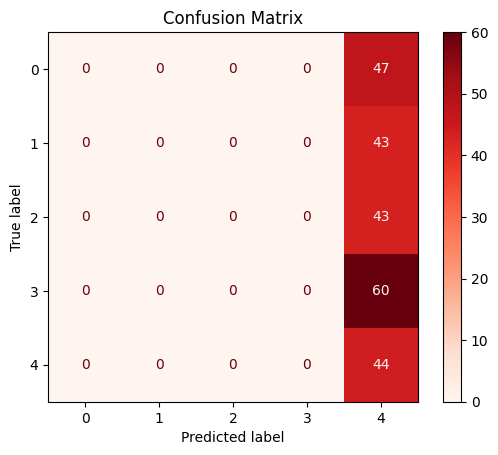

In [ ]:
cm = confusion_matrix(true_labels, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Reds)
plt.title("Confusion Matrix")
plt.show()

In [ ]:
model.save("efficientnet_dog_breeds.h5")
print("Model zapisano jako efficientnet_dog_breeds.h5")

Model zapisano jako efficientnet_dog_breeds.h5


In [ ]:
# Maksymalna wartość punktów za Zad 3.5: 15
punkty.append(15)

In [ ]:
razem = sum(punkty)
razem_pr = razem/max
if razem_pr >= 0.90:
  ocena = 5
elif razem_pr >= 0.85:
  ocena = 4.5
elif razem_pr >= 0.70:
  ocena = 4
elif razem_pr >= 0.65:
  ocena = 3.5
elif razem_pr >= 0.50:
  ocena = 3
else:
  ocena = 2

print("Punktacja za kolejne zadania: ", punkty)
print("Suma punktów: ", razem)
print("Udział procentowy: ", razem_pr*100, "%")
print("Ocena: ", ocena)

Punktacja za kolejne zadania:  [10, 10, 10, 10, 15]
Suma punktów:  55
Udział procentowy:  100.0 %
Ocena:  5
